# 计算原理
考虑一个电容器的恒流充放电过程，其充放电电流大小为$I$，活性物质的质量为$m$，充放电的电压范围为$[V_1,V_2]$。假设在一次循环中，其比电容为$C_p$，充电
时间和放电时间分别为$t_1,t_2$，则

$$ \left \{
    \begin{aligned}
    &Q_{charge}=I \times t_1 \\ 
    \\
    &Q_{dischage}=I \times t_2\\ 
    \end{aligned}
    \right.$$

库仑效率

$$\eta=\frac{Q_{dischage}}{Q_{charge}}=\frac{t_2}{t_1}$$

比电容

$$C_p=\frac{Q_{discharge}}{m \times (V_2-V_1)}=\frac{I \times t_2}{m \times (V_2-V_1)}=\frac{i\times t_2}{V_2-V_1}$$

其中$i=I/m$为比电流。

# 使用方法
1.确保所有要处理的文件在同一个文件夹下，且命名规则为"GCD-x.txt"，其中x为对应的比电流的10倍（如充放电比电流为1A/g时文件名为"GCD-10.txt"）。复制这些文件的路径。

2.更改这些文件的路径 directory=r'-------'，其中-------部分为路径。

3.运行。

Specific Current: 1.0 A/g 	 Cpn: 835.38 F/g 	 Cp: 821.51 F/g 	  Coulomb Efficiency: 98.34 %
Specific Current: 2.0 A/g 	 Cpn: 782.18 F/g 	 Cp: 775.08 F/g 	  Coulomb Efficiency: 99.09 %
Specific Current: 4.0 A/g 	 Cpn: 708.43 F/g 	 Cp: 705.55 F/g 	  Coulomb Efficiency: 99.59 %
Specific Current: 6.0 A/g 	 Cpn: 639.15 F/g 	 Cp: 638.26 F/g 	  Coulomb Efficiency: 99.86 %
Specific Current: 8.0 A/g 	 Cpn: 550.36 F/g 	 Cp: 549.74 F/g 	  Coulomb Efficiency: 99.89 %
Specific Current: 10.0 A/g 	 Cpn: 425.03 F/g 	 Cp: 424.76 F/g 	  Coulomb Efficiency: 99.94 %


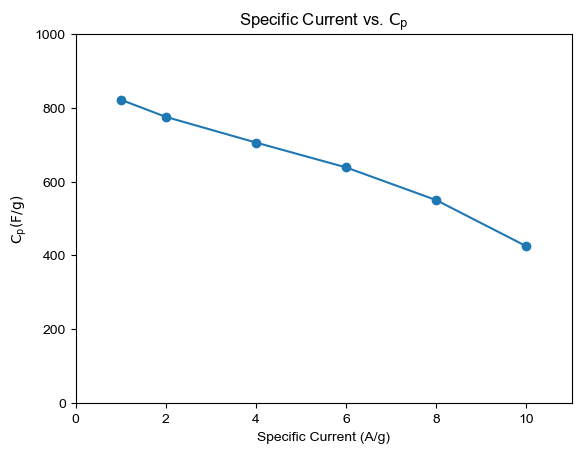

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False  #解决负号无法显示的问题
}
rcParams.update(config)

# 文件目录路径
directory = r'G:\Liazulene\电化学数据\LA044\044-5'

final_list=[]

txt_files = [file for file in os.listdir(directory) if file.startswith('GCD-') and file.endswith('.txt') and not file.endswith('c.txt')]

for txt_file in txt_files:
    file_path = os.path.join(directory, txt_file)
    # 解析文件名中的扫描速率
    specific_current = int(txt_file.split('GCD-')[1].split('.')[0])/10  # 获取 'mVps' 之前的数字部分，并转换为整数

    coordinates = []

    with open(file_path, 'r') as file:
        # 跳过无效行
        line = file.readline().strip()
        while not line.startswith('Time/sec'):
            line = file.readline().strip()
        
        for line in file:
                if line.startswith('Summary:'):
                    break  # 遇到无效数据的开头，跳出循环
            # 移除行末的换行符并使用逗号分隔符分割行
                parts = line.strip().split(',')
            
            # 确保每行包含的数据量正确
                if len(parts) == 10:
                # 将前四个数据转换为浮点数，并创建坐标点
                    try:
                        time = float(parts[0])
                        potential = float(parts[1])
                        step = float(parts[2])
                        cycle = float(parts[3])
                        coordinate = (time, potential, step, cycle)
                        coordinates.append(coordinate)
                    except ValueError:
                        print(f"无法解析行：{line}")

    # 创建一个矩阵用来存储数据，这个矩阵具有5行，
    # 第一行是cycle的值，第二行是这个cycle中time的最小值，
    # 第三行是这个cycle中potential达到最大值时的time值，
    # 第四行是这个cycle中time的最大值，第五行是这个cycle中Potential的最值的差
    # 行数a = 5，列数rows是cycle的数量
    a = 5 
    rows = int(max(coordinate[3] for coordinate in coordinates))
    matrix = [[0 for i in range(rows)] for j in range(a)]
    for i in range(rows):
        matrix[0][i] = i + 1


    # 创建一个字典用于存储每个不同step值对应的最大和最小time值
    cycle_time_data = {}

    # 遍历coordinates列表
    for coordinate in coordinates:
        cycle_value = coordinate[3]
        time_value = coordinate[0]

        if cycle_value not in cycle_time_data:
            # 如果step值不在字典中，添加一个新的条目
            cycle_time_data[cycle_value] = {'max_time': time_value, 'min_time': time_value}
        else:
            # 更新字典中的max_time和min_time值
            cycle_time_data[cycle_value]['max_time'] = max(cycle_time_data[cycle_value]['max_time'], time_value)
            cycle_time_data[cycle_value]['min_time'] = min(cycle_time_data[cycle_value]['min_time'], time_value)

    # 遍历字典并输出结果
    for cycle_value, time_values in cycle_time_data.items():
        max_time = time_values['max_time']
        min_time = time_values['min_time']
        for i in range(rows):
            if cycle_value ==  matrix[0][i]:
                matrix[1][i] = min_time
                matrix[3][i] = max_time

    # 创建一个字典用于存储cycle值对应的time和potential
    cycle_time_potential = {}  

    # 遍历coordinates列表
    for coordinate in coordinates:
        cycle_value = coordinate[3]
        time_value = coordinate[0]
        potential_value = coordinate[1]

        if cycle_value not in cycle_time_potential:
            # 如果cycle值不在字典中，添加一个新的条目
            cycle_time_potential[cycle_value] = {'time': time_value, 'potential': potential_value}
        else:
            # 检查当前potential是否大于字典中的potential
            if potential_value > cycle_time_potential[cycle_value]['potential']:
                cycle_time_potential[cycle_value] = {'time': time_value, 'potential': potential_value}

    # 遍历字典并输出结果
    for cycle_value, values in cycle_time_potential.items():
        max_potential_time = values['time']
        max_potential = values['potential']
        for i in range(rows):
            if cycle_value ==  matrix[0][i]:
                matrix[2][i] = max_potential_time

    # 创建一个字典用于存储cycle值对应的potential的最大值和最小值
    cycle_potential = {}  

    # 遍历coordinates列表
    for coordinate in coordinates:
        cycle_value = coordinate[3]
        potential_value = coordinate[1]

        if cycle_value not in cycle_potential:
            # 如果cycle值不在字典中，添加一个新的条目
            cycle_potential[cycle_value] = {'max_potential': potential_value, 'min_potential': potential_value}
        else:
            # 检查当前potential是否大于字典中的max_potential
            if potential_value > cycle_potential[cycle_value]['max_potential']:
                cycle_potential[cycle_value]['max_potential'] = potential_value
            # 检查当前potential是否小于字典中的min_potential
            if potential_value < cycle_potential[cycle_value]['min_potential']:
                cycle_potential[cycle_value]['min_potential'] = potential_value

    # 计算并输出差值
    cycle_differences = {}  # 存储每个cycle的最大和最小potential差值
    for cycle_value, values in cycle_potential.items():
        max_potential = values['max_potential']
        min_potential = values['min_potential']
        difference = max_potential - min_potential
        cycle_differences[cycle_value] = difference

    # 遍历差值字典并输出结果
    for cycle_value, difference in cycle_differences.items():
        for i in range(rows):
            if cycle_value ==  matrix[0][i]:
                matrix[4][i] = difference

    matrix = [row[1:-1] for row in matrix]
    matrix[0] = [x - 1 for x in matrix[0]]

    # 计算比电容，为矩阵的第六行
    Cp = []

    for col_index in range(len(matrix[0])):
        numerator = matrix[3][col_index] - matrix[2][col_index]
        denominator = matrix[4][col_index]
        
        # 防止除以0错误
        if denominator != 0:
            result = specific_current * numerator / denominator
        else:
            result = None
        
        # 添加结果到新行
        Cp.append(result)

    matrix.append(Cp)


    CE = []

    for col_index in range(len(matrix[0])):
        numerator = matrix[3][col_index] - matrix[2][col_index]
        denominator = matrix[2][col_index] - matrix[1][col_index]
        
        # 防止除以0错误
        if denominator != 0:
            result = specific_current * numerator / denominator
        else:
            result = None
        
        # 添加结果到新行
        CE.append(result)

    # print(CE)
    matrix.append(CE)

    # 计算平均放电比电容
    Cp_average = sum(matrix[5][1:])/len(matrix[5][1:])


    #计算电容保持率，作为第八行，计算最终电容保持率
    row_index = 5
    row_to_modify = matrix[row_index]
    first_element = row_to_modify[0]
    CR = [x / first_element for x in row_to_modify]
    matrix.append(CR)

    CR_final = 100*matrix[7][-1]



    #计算平均库仑效率
    CE_average = 100*sum(matrix[6][1:])/len(matrix[6][1:])


    #计算充电比电容与平均充电比电容
    Cpn = []

    for col_index in range(len(matrix[0])):
        numerator = matrix[2][col_index] - matrix[1][col_index]
        denominator = matrix[4][col_index]
        
        # 防止除以0错误
        if denominator != 0:
            result = specific_current * numerator / denominator
        else:
            result = None
        
        # 添加结果到新行
        Cpn.append(result)

    matrix.append(Cpn)

    Cpn_average = sum(matrix[8][1:])/len(matrix[8][1:])
    #print("比电流SC=", specific_current)
    #print("平均充电比电容Cp=", Cpn_average, "F/g")
    #print("平均放电比电容Cp=", Cp_average, "F/g")
    CE = Cp_average/Cpn_average*100
    k2 = (specific_current, Cpn_average, Cp_average, CE)
    final_list.append(k2)

final_array = np.array(final_list)

sorted_indices = np.argsort(final_array[:, 0])
sorted_scan_list = final_array[sorted_indices]

# 提取排序后的 Sc 和 Cp 值
sorted_sc = sorted_scan_list[:, 0]
sorted_Cpn = sorted_scan_list[:, 1]
sorted_Cp = sorted_scan_list[:, 2]
sorted_CE = sorted_scan_list[:, 3]

for k, Cpn, Cp ,CE in zip(sorted_sc, sorted_Cpn, sorted_Cp, sorted_CE):
    print("Specific Current:", k, "A/g", "\t Cpn: {:.2f}".format(Cpn), "F/g", "\t Cp: {:.2f}".format(Cp),"F/g", "\t  Coulomb Efficiency: {:.2f}".format(CE), "%")
# 画出 k-Cp 图
plt.plot(sorted_sc, sorted_Cp, marker='o')
plt.xlabel('Specific Current (A/g)')
plt.ylabel('$\mathrm{C_p (F/g)}$')
plt.title('Specific Current vs. $\mathrm{C_p}$')
plt.xlim((0, 11))
plt.ylim((0, 1000))
plt.grid(False)
plt.savefig("GCD.eps", dpi=600, format="eps")
plt.show()

